# MC1_Analysis_Part1: Data understanding and preparation

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

#import data to workspace
mc1_original = pd.read_csv('MC1_Datasets\MC1_raw.csv')
mc1_data = mc1_original.copy()

## plot template

In [38]:
plt.style.use('ggplot')

## Data Understanding


### Date Sorting

In [39]:
mc1_data = mc1_data.sort_values(by='Date')
mc1_data

,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,124313414.0,13267,1234567890,01/12/2020,01:04:43,PA05-1901,OK,OK,-2020.9,-2255.9,-1809.6,-1649.6,NaN
144038,124313414.0,15528,1234567890,01/12/2020,03:45:18,PA05-1901,OK,OK,-1591.9,-1786.1,-2040.2,-1959.5,NaN
144039,124313414.0,15529,1234567890,01/12/2020,03:45:18,PA05-1901,OK,OK,-1609.8,-1758.4,-2194.5,-2033.2,NaN
144040,124313414.0,15530,1234567890,01/12/2020,03:45:18,PA05-1901,OK,OK,-1580.4,-1762.4,-1900.0,-1908.2,NaN
144041,124313414.0,15531,1234567890,01/12/2020,03:45:18,PA05-1901,OK,OK,-1323.9,-1513.7,-1940.9,-1940.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259883,124313414.0,7305,1234567890,29/12/2020,03:22:18,PA05-1901,OK,OK,10.6,9.8,4.2,-42.8,16.7
259882,124313414.0,7304,1234567890,29/12/2020,03:22:18,PA05-1901,OK,OK,12.3,5.7,9.8,-32.0,9.7
259881,124313414.0,7303,1234567890,29/12/2020,03:22:18,PA05-1901,OK,OK,13.1,-2.1,34.3,-20.2,30.1
259976,124313414.0,7398,1234567890,29/12/2020,03:28:23,PA05-1901,OK,NG,12.4,10.6,78.9,112.3,365.6


1.2) define the day of week, see how many days are OK and NG

### Missing values in each column

In [40]:
print("Brief Report of missing values in MC1 Dataset:")
print(mc1_data.isnull().sum())

Brief Report of missing values in MC1 Dataset:
Part                   0
IC 2D                  0
Lot                    0
Date                   0
Time                   0
Machine                0
Server result          0
Machine result         0
(um)Point1             0
(um)Point2         39456
(um)Point3         80651
(um)Point4         80651
(um)Point5        236535
dtype: int64


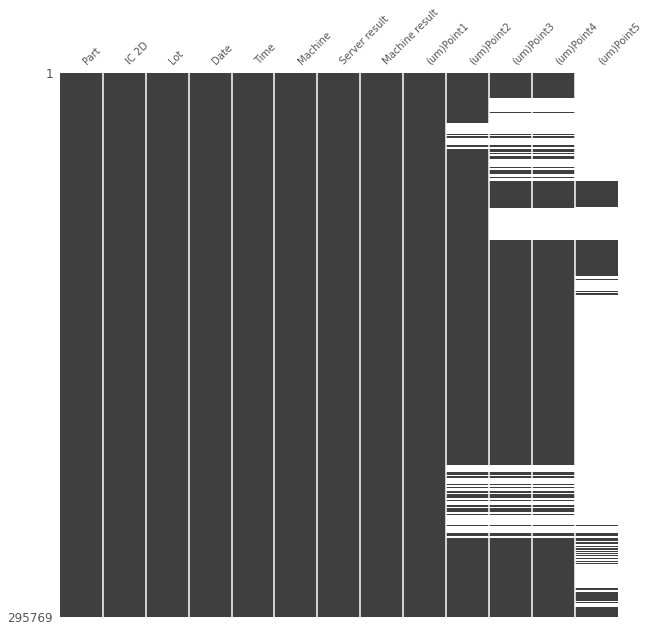

In [41]:
fig, axs = plt.subplots(figsize=(10,10))
msno.matrix(mc1_data,ax=axs,sparkline=False,fontsize=10)
plt.show()
#msno.bar(mc1_data).title.set_text('Barchart of non-null values in columns in MC1 dataframe')

### Get day of week

In [42]:
mc1_data['Date'] = pd.to_datetime(mc1_data['Date'])
mc1_data['dayOfWeek'] = mc1_data['Date'].dt.day_name()

mc1_data


,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5,dayOfWeek
0,124313414.0,13267,1234567890,2020-01-12,01:04:43,PA05-1901,OK,OK,-2020.9,-2255.9,-1809.6,-1649.6,NaN,Sunday
144038,124313414.0,15528,1234567890,2020-01-12,03:45:18,PA05-1901,OK,OK,-1591.9,-1786.1,-2040.2,-1959.5,NaN,Sunday
144039,124313414.0,15529,1234567890,2020-01-12,03:45:18,PA05-1901,OK,OK,-1609.8,-1758.4,-2194.5,-2033.2,NaN,Sunday
144040,124313414.0,15530,1234567890,2020-01-12,03:45:18,PA05-1901,OK,OK,-1580.4,-1762.4,-1900.0,-1908.2,NaN,Sunday
144041,124313414.0,15531,1234567890,2020-01-12,03:45:18,PA05-1901,OK,OK,-1323.9,-1513.7,-1940.9,-1940.3,NaN,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259883,124313414.0,7305,1234567890,2020-12-29,03:22:18,PA05-1901,OK,OK,10.6,9.8,4.2,-42.8,16.7,Tuesday
259882,124313414.0,7304,1234567890,2020-12-29,03:22:18,PA05-1901,OK,OK,12.3,5.7,9.8,-32.0,9.7,Tuesday
259881,124313414.0,7303,1234567890,2020-12-29,03:22:18,PA05-1901,OK,OK,13.1,-2.1,34.3,-20.2,30.1,Tuesday
259976,124313414.0,7398,1234567890,2020-12-29,03:28:23,PA05-1901,OK,NG,12.4,10.6,78.9,112.3,365.6,Tuesday


### Machine result analysis

### Daily NG rate

,Date,Machine result,count
48,29/12/2020,NG,406
46,28/12/2020,NG,1674
44,27/12/2020,NG,222
42,26/12/2020,NG,398
40,25/12/2020,NG,152
38,24/12/2020,NG,1082
36,23/12/2020,NG,194
34,22/12/2020,NG,270
32,21/12/2020,NG,162
30,19/12/2020,NG,464


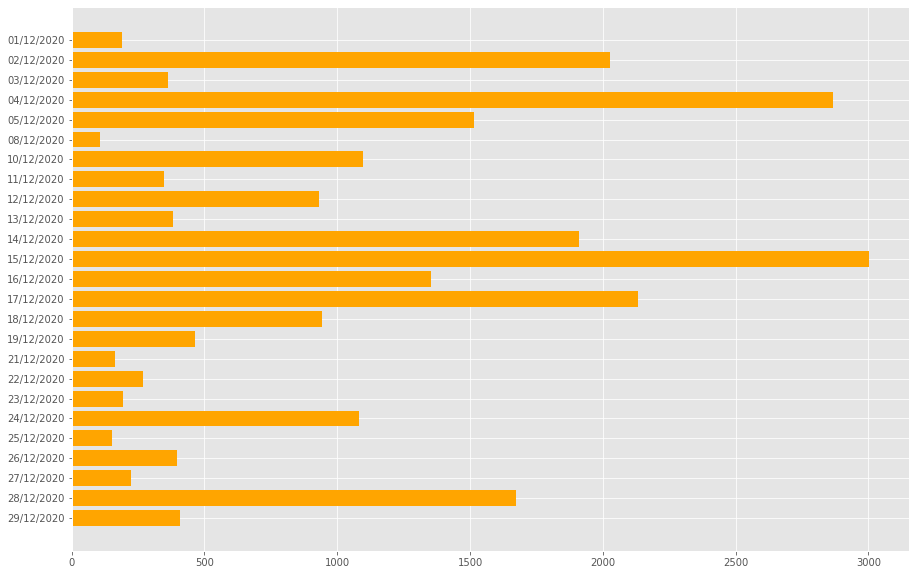

In [43]:
dftest = mc1_original.copy()
dftest = dftest.groupby(["Date","Machine result"])['Machine result'].count().reset_index(name='count')
dftest.sort_values(by='Machine result',ascending=True,inplace=True)
dftest = dftest.iloc[:25,:]
dftest.sort_values(by='Date',ascending=False,inplace=True)
dateArr = dftest['Date']
x = dateArr.to_numpy()
countArr = dftest['count']
y = countArr.to_numpy()

display(dftest)

fig,ax = plt.subplots(1,figsize=(15,10))
ax.barh(x,y,color='orange')
plt.show()

In [44]:
df1 = mc1_data.groupby(['dayOfWeek', 'Machine result'])['Machine result'].agg('count')
df1

dayOfWeek  Machine result
Friday     NG                 1096
           OK                17102
Monday     NG                 4842
           OK                43341
Saturday   NG                 1794
           OK                32023
Sunday     NG                 3658
           OK                32306
Thursday   NG                 3927
           OK                57318
Tuesday    NG                 5194
           OK                51892
Wednesday  NG                 3680
           OK                37596
Name: Machine result, dtype: int64

,Machine result,dayOfWeek,count
0,NG,Friday,1096
2,NG,Saturday,1794
3,NG,Sunday,3658
6,NG,Wednesday,3680
4,NG,Thursday,3927
1,NG,Monday,4842
5,NG,Tuesday,5194


<AxesSubplot:xlabel='Machine result = "NG" count', ylabel='dayOfWeek'>

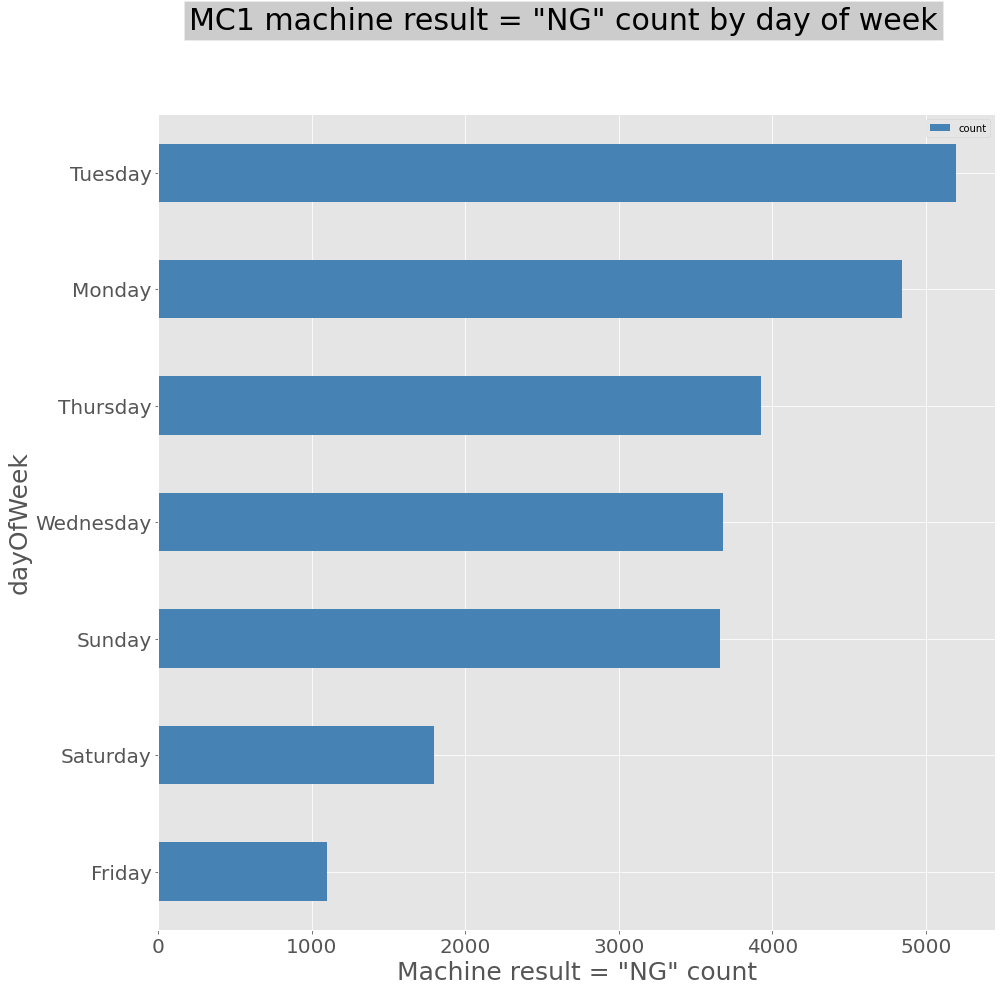

In [45]:
df2 = mc1_data.groupby(['Machine result','dayOfWeek'])['Machine result'].count().reset_index(name='count')
df2.sort_values(by='count',ascending=True,inplace=True)
df2 = df2.iloc[:7,:]
display(df2)

fig, axs = plt.subplots(figsize=(15,15))
plt.xlabel('Machine result = "NG" count',fontsize=25)
plt.ylabel('Day of Week',fontsize=25)
plt.suptitle('MC1 machine result = "NG" count by day of week',fontsize=30,bbox={'facecolor':'0.8','pad':5})
df2.plot(x='dayOfWeek',y='count',kind='barh',color='steelblue',ax=axs,grid=True,fontsize=20)



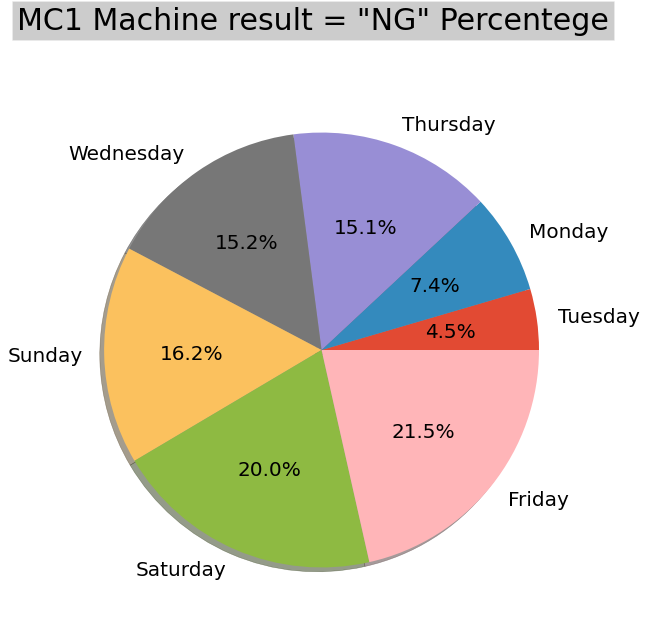

In [46]:

fig, axs = plt.subplots(figsize=(10,10))
plt.suptitle('MC1 Machine result = "NG" Percentege',fontsize=30,bbox={'facecolor':'0.8','pad':5})

dow_label = ['Tuesday','Monday','Thursday','Wednesday','Sunday','Saturday','Friday']
#dow_explode = (0.3,0,0,0,0,0,0.3)
#this color very disgusting...
#dow_colors = {'red','orange','yellow','green','blue','violet','purple'}
plt.pie(df2['count'],labels=dow_label,autopct='%1.1f%%',shadow=True,
        textprops={'fontsize':20})
plt.show()

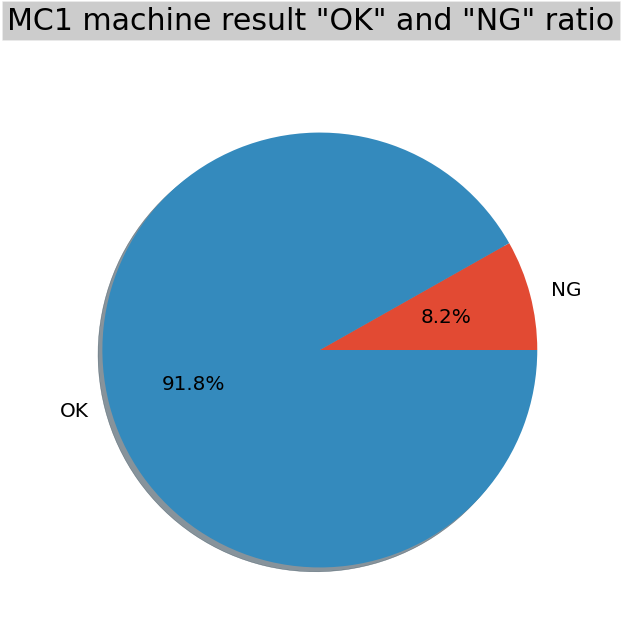

In [47]:
df3 = mc1_data.groupby(['Machine result'])['Machine result'].count().reset_index(name='count')
fig, axs = plt.subplots(figsize=(10,10))
plt.suptitle('MC1 machine result "OK" and "NG" ratio',fontsize=30,bbox={'facecolor':'0.8','pad':5})

ratio_label = ['NG','OK']
plt.pie(df3['count'],labels=ratio_label,autopct='%1.1f%%',shadow=True,
        textprops={'fontsize':20})
plt.show()

### (um)Points analysis 

<AxesSubplot:>

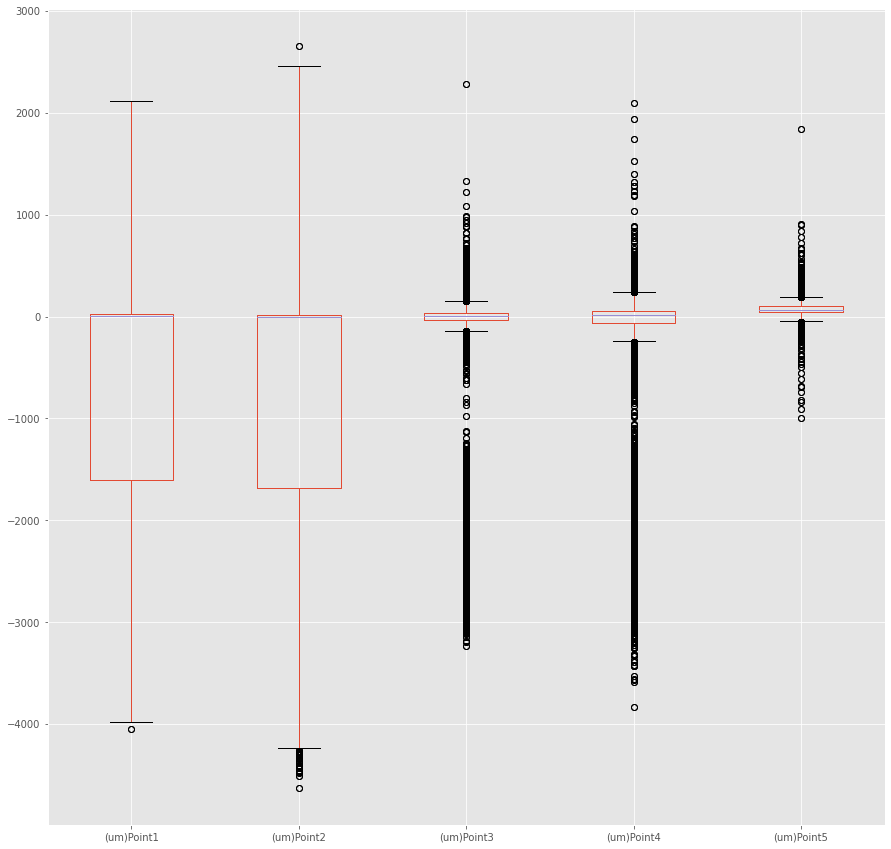

In [48]:
fig, axs = plt.subplots(figsize=(15,15))
#plt.suptitle('MC1 (um)Point1 to (um)Point5 boxplot',fontsize=30,bbox={'facecolor':'0.8','pad':5})
mc1_data.boxplot(column=['(um)Point1','(um)Point2','(um)Point3','(um)Point4','(um)Point5'])

<AxesSubplot:xlabel='(um)Point5', ylabel='Count'>

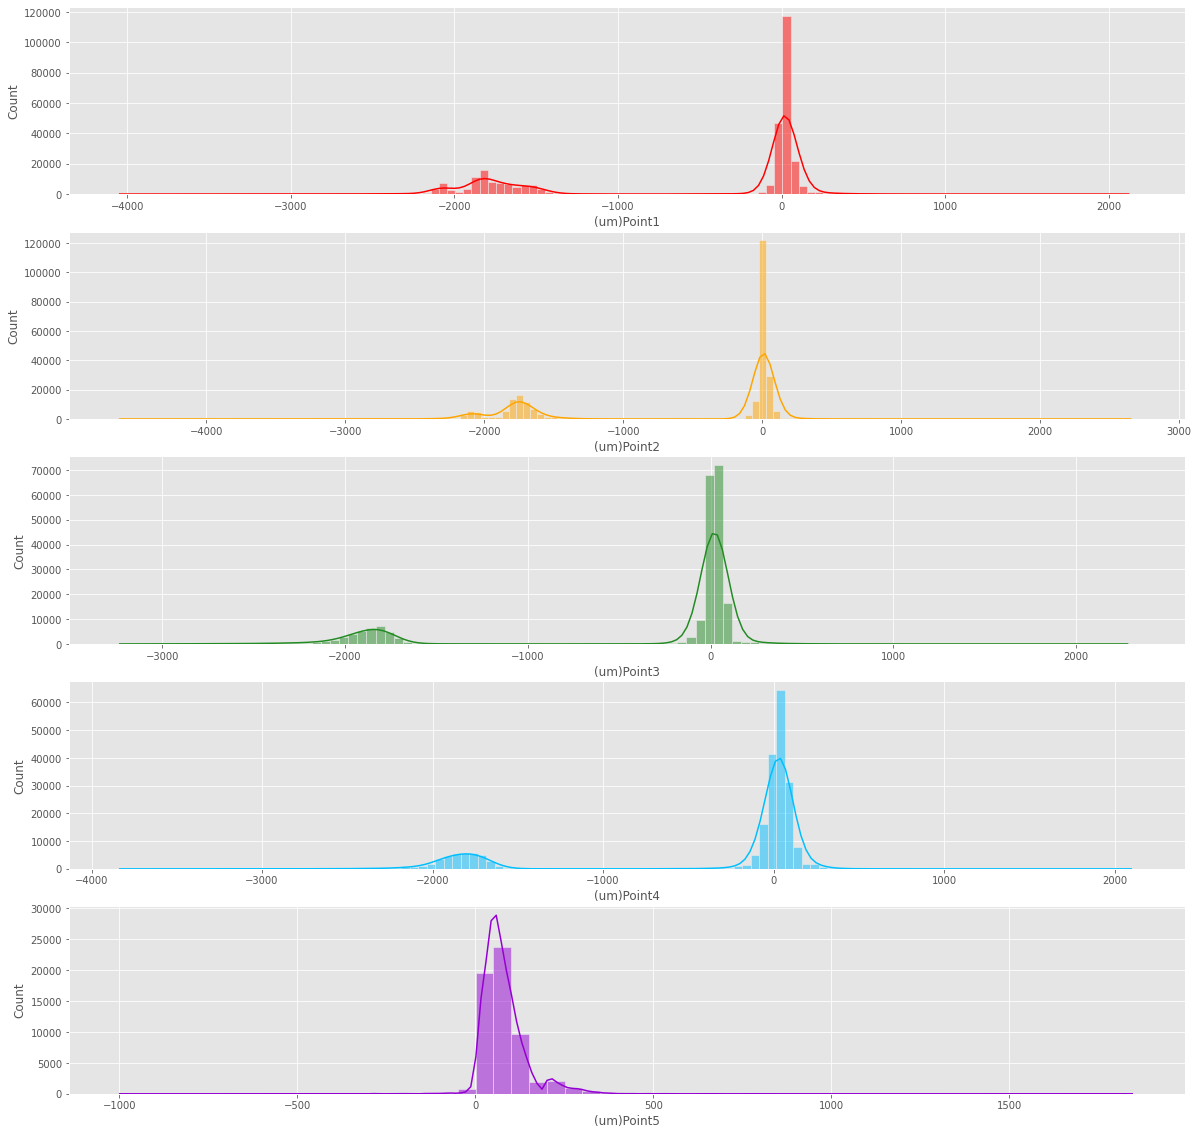

In [49]:
fig, axs = plt.subplots(5,1,figsize=(20,20))

sns.histplot(mc1_data['(um)Point1'],ax=axs[0],color='red',binwidth=50,kde=True)
sns.histplot(mc1_data['(um)Point2'],ax=axs[1],color='orange',binwidth=50,kde=True)
sns.histplot(mc1_data['(um)Point3'],ax=axs[2],color='forestgreen',binwidth=50,kde=True)
sns.histplot(mc1_data['(um)Point4'],ax=axs[3],color='deepskyblue',binwidth=50,kde=True)
sns.histplot(mc1_data['(um)Point5'],ax=axs[4],color='darkviolet',binwidth=50,kde=True)


## Data Preparation

### drop unnecessary columns

In [50]:
mc1_data.drop(['Part','IC 2D','Lot','Date','Time','Machine','Server result'],
              axis=1,inplace=True)
mc1_data.head(8)


,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5,dayOfWeek
0,OK,-2020.9,-2255.9,-1809.6,-1649.6,NaN,Sunday
144038,OK,-1591.9,-1786.1,-2040.2,-1959.5,NaN,Sunday
144039,OK,-1609.8,-1758.4,-2194.5,-2033.2,NaN,Sunday
144040,OK,-1580.4,-1762.4,-1900.0,-1908.2,NaN,Sunday
144041,OK,-1323.9,-1513.7,-1940.9,-1940.3,NaN,Sunday
144042,OK,-1588.6,-1754.6,-1885.4,-1926.3,NaN,Sunday
144043,OK,-1566.9,-1761.2,-1964.3,-1946.8,NaN,Sunday
144044,OK,-1779.0,-1804.0,-2095.4,-2261.1,NaN,Sunday


### statistical analysis

In [51]:
mc1_data.describe()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
count,295769.000000,256313.000000,215118.000000,215118.000000,59234.000000
mean,-542.510961,-564.139842,-340.258549,-323.870445,78.598349
std,854.804736,855.917249,761.961908,741.676511,64.978949
min,-4045.600000,-4623.900000,-3232.900000,-3835.000000,-999.400000
25%,-1599.000000,-1686.700000,-34.100000,-63.900000,41.000000
50%,4.700000,-1.300000,9.100000,16.000000,66.100000
75%,24.900000,13.100000,38.800000,56.500000,101.200000
max,2120.100000,2650.900000,2280.700000,2097.600000,1845.200000


### reindex and rename columns

In [52]:
#put machine result to the end
column_names = ['dayOfWeek','(um)Point1','(um)Point2','(um)Point3','(um)Point4','(um)Point5','Machine result']
mc1_data = mc1_data.reindex(columns=column_names)
mc1_data

,dayOfWeek,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5,Machine result
0,Sunday,-2020.9,-2255.9,-1809.6,-1649.6,NaN,OK
144038,Sunday,-1591.9,-1786.1,-2040.2,-1959.5,NaN,OK
144039,Sunday,-1609.8,-1758.4,-2194.5,-2033.2,NaN,OK
144040,Sunday,-1580.4,-1762.4,-1900.0,-1908.2,NaN,OK
144041,Sunday,-1323.9,-1513.7,-1940.9,-1940.3,NaN,OK
...,...,...,...,...,...,...,...
259883,Tuesday,10.6,9.8,4.2,-42.8,16.7,OK
259882,Tuesday,12.3,5.7,9.8,-32.0,9.7,OK
259881,Tuesday,13.1,-2.1,34.3,-20.2,30.1,OK
259976,Tuesday,12.4,10.6,78.9,112.3,365.6,NG


In [53]:
mc1_data.rename(columns={'(um)Point1':'point1',
                         '(um)Point2':'point2',
                         '(um)Point3':'point3',
                         '(um)Point4':'point4',
                         '(um)Point5':'point5',
                         'Machine result':'machineResult'},inplace=True)
mc1_data.head(8)

,dayOfWeek,point1,point2,point3,point4,point5,machineResult
0,Sunday,-2020.9,-2255.9,-1809.6,-1649.6,NaN,OK
144038,Sunday,-1591.9,-1786.1,-2040.2,-1959.5,NaN,OK
144039,Sunday,-1609.8,-1758.4,-2194.5,-2033.2,NaN,OK
144040,Sunday,-1580.4,-1762.4,-1900.0,-1908.2,NaN,OK
144041,Sunday,-1323.9,-1513.7,-1940.9,-1940.3,NaN,OK
144042,Sunday,-1588.6,-1754.6,-1885.4,-1926.3,NaN,OK
144043,Sunday,-1566.9,-1761.2,-1964.3,-1946.8,NaN,OK
144044,Sunday,-1779.0,-1804.0,-2095.4,-2261.1,NaN,OK


### label encoding machine result

In [54]:
#creating instance of labelencoder
le = LabelEncoder()
mc1_data['machineResult'] = le.fit_transform(mc1_data['machineResult'])
mc1_data['machineResult'].unique()
mc1_data.head(8)

,dayOfWeek,point1,point2,point3,point4,point5,machineResult
0,Sunday,-2020.9,-2255.9,-1809.6,-1649.6,NaN,1
144038,Sunday,-1591.9,-1786.1,-2040.2,-1959.5,NaN,1
144039,Sunday,-1609.8,-1758.4,-2194.5,-2033.2,NaN,1
144040,Sunday,-1580.4,-1762.4,-1900.0,-1908.2,NaN,1
144041,Sunday,-1323.9,-1513.7,-1940.9,-1940.3,NaN,1
144042,Sunday,-1588.6,-1754.6,-1885.4,-1926.3,NaN,1
144043,Sunday,-1566.9,-1761.2,-1964.3,-1946.8,NaN,1
144044,Sunday,-1779.0,-1804.0,-2095.4,-2261.1,NaN,1


### encode day of week

In [55]:
days = {'Sunday':   0,
        'Monday':   1,
        'Tuesday':  2,
        'Wednesday':3,
        'Thursday': 4,
        'Friday':   5,
        'Saturday': 6}
mc1_data['dayOfWeek'] = mc1_data['dayOfWeek'].apply(lambda x : days[x])
mc1_data.groupby(mc1_data.dayOfWeek)
mc1_data

,dayOfWeek,point1,point2,point3,point4,point5,machineResult
0,0,-2020.9,-2255.9,-1809.6,-1649.6,NaN,1
144038,0,-1591.9,-1786.1,-2040.2,-1959.5,NaN,1
144039,0,-1609.8,-1758.4,-2194.5,-2033.2,NaN,1
144040,0,-1580.4,-1762.4,-1900.0,-1908.2,NaN,1
144041,0,-1323.9,-1513.7,-1940.9,-1940.3,NaN,1
...,...,...,...,...,...,...,...
259883,2,10.6,9.8,4.2,-42.8,16.7,1
259882,2,12.3,5.7,9.8,-32.0,9.7,1
259881,2,13.1,-2.1,34.3,-20.2,30.1,1
259976,2,12.4,10.6,78.9,112.3,365.6,0


## data distribution

What is KDE? What does KDE tells you?

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.
https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

### missing values percentage in each points

In [56]:
print("MC1 column point1 to point5 missing values percentage\n")
print("Percentage of missing values in point1:  %.2f"%round((mc1_data['point1'].isnull().sum()/len(mc1_data.index) * 100),2),"%")
print("Percentage of missing values in point2:",round((mc1_data['point2'].isnull().sum()/len(mc1_data.index) * 100),2),"%")
print("Percentage of missing values in point3:",round((mc1_data['point3'].isnull().sum()/len(mc1_data.index) * 100),2),"%")
print("Percentage of missing values in point4:",round((mc1_data['point4'].isnull().sum()/len(mc1_data.index) * 100),2),"%")
print("Percentage of missing values in point5:",round((mc1_data['point5'].isnull().sum()/len(mc1_data.index) * 100),2),"%")
print("\n")


MC1 column point1 to point5 missing values percentage

Percentage of missing values in point1:  0.00 %
Percentage of missing values in point2: 13.34 %
Percentage of missing values in point3: 27.27 %
Percentage of missing values in point4: 27.27 %
Percentage of missing values in point5: 79.97 %




## Missing values and outliers handling

### "The basic 6"


Total rows dropped
--------------------
Rows dropped in Case 1 :  117998
Rows dropped in Case 2 :  99624
Rows dropped in Case 3 :  50288
Rows dropped in Case 4 :  10380
Rows dropped in Case 5 :  8498
Rows dropped in Case 6 :  2476


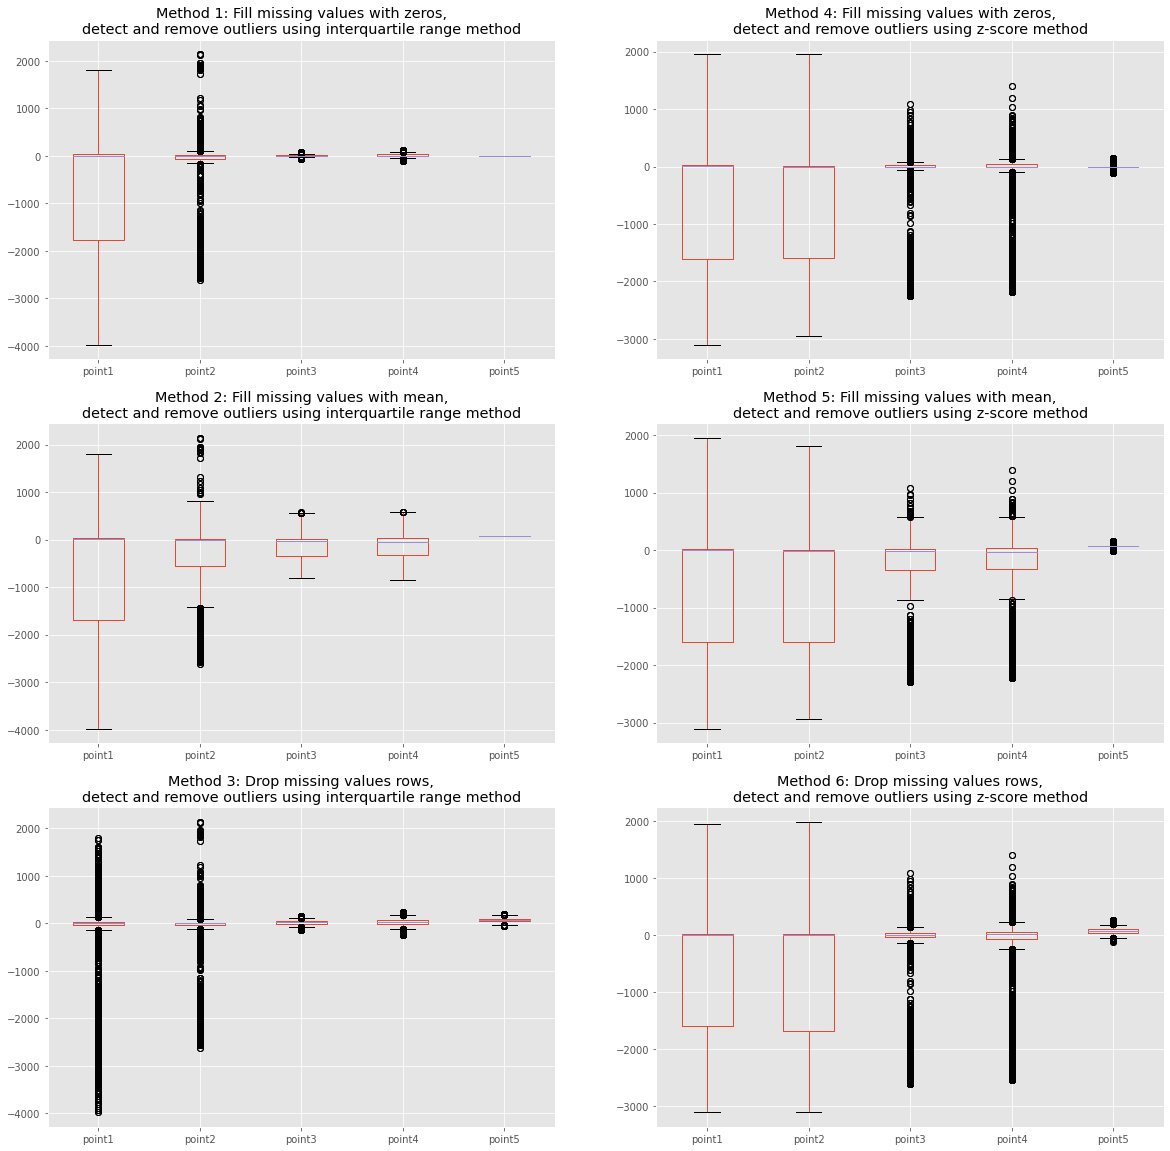

In [57]:
#grouped columns
cols = ['point1','point2','point3','point4','point5']

dataframe = mc1_data.copy()
rdroppedList = []

#Method 1: fill missing values with 0 and remove outliers using iqr
#---------------------------------------------------------------------------------------------------------------------------#
dfFillZeros = dataframe.copy()
dfFillZeros[cols] = dfFillZeros[cols].fillna(value=0)
r1 = len(dfFillZeros.index)

q1 = dfFillZeros[cols].quantile(0.25)
q3 = dfFillZeros[cols].quantile(0.75)
iqr = q3 - q1 
df1 = dfFillZeros[~((dfFillZeros[cols] < (q1 - iqr * 1.5)) | (dfFillZeros[cols] > (q3 + iqr * 1.5))).any(axis=1)]
r2 = len(df1.index)

#count how many rows dropped
df1_rdropped_count = r1 - r2
rdroppedList.append(df1_rdropped_count)


#Method 2: fill missing values with mean and remove outliers using iqr
#---------------------------------------------------------------------------------------------------------------------------#
dfFillMean = dataframe.copy()
dfFillMean[cols] = dfFillMean[cols].fillna(value=dfFillMean[cols].mean(skipna=True))
r1 = len(dfFillMean.index)

q1 = dfFillMean[cols].quantile(0.25)
q3 = dfFillMean[cols].quantile(0.75)
iqr = q3 - q1 
df2 = dfFillMean[~((dfFillMean[cols] < (q1 - iqr * 1.5)) | (dfFillMean[cols] > (q3 + iqr * 1.5))).any(axis=1)]
r2 = len(df2.index)

#count how many rows dropped
df2_rdropped_count = r1 - r2
rdroppedList.append(df2_rdropped_count)


#Method 3: drop missing values rows and remove outliers using iqr
#---------------------------------------------------------------------------------------------------------------------------#
dfDropNA = dataframe.copy()
dfDropNA.dropna(subset=cols,thresh=1,inplace=True) #drop that column whenever there is 1 NaN
r1 = len(dfDropNA.index)

q1 = dfDropNA[cols].quantile(0.25)
q3 = dfDropNA[cols].quantile(0.75)
iqr = q3 - q1 
df3 = dfDropNA[~((dfDropNA[cols] < (q1 - iqr * 1.5)) | (dfDropNA[cols] > (q3 + iqr * 1.5))).any(axis=1)]
r2 = len(df3.index)

#count how many rows dropped
df3_rdropped_count = r1 - r2
rdroppedList.append(df3_rdropped_count)


#Method 4: fill missing values with 0 and remove outliers using zscore
#---------------------------------------------------------------------------------------------------------------------------#
dfFillZeros = dataframe.copy()
dfFillZeros[cols] = dfFillZeros[cols].fillna(value=0)
r1 = len(dfFillMean.index)

df4 = dfFillZeros[~((dfFillZeros[cols] < (dfFillZeros[cols].mean() - (3 * dfFillZeros[cols].std()))) | 
                  (dfFillZeros[cols] > (dfFillZeros[cols].mean() + (3 * dfFillZeros[cols].std())))).any(axis=1)]
r2 = len(df4.index)

#count how many rows dropped
df4_rdropped_count = r1 - r2
rdroppedList.append(df4_rdropped_count)


#Method 5: fill missing values with Mean and remove outliers using zscore
#---------------------------------------------------------------------------------------------------------------------------#
dfFillMean[cols] = dataframe[cols].fillna(value=dataframe[cols].mean(skipna=True))
r1 = len(dfFillMean.index)

df5 = dfFillMean[~((dfFillMean[cols] < (dfFillMean[cols].mean() - (3 * dfFillMean[cols].std()))) | 
                  (dfFillMean[cols] > (dfFillMean[cols].mean() + (3 * dfFillMean[cols].std())))).any(axis=1)]
r2 = len(df5.index)

#count how many rows dropped
df5_rdropped_count = r1 - r2
rdroppedList.append(df5_rdropped_count)


#Method 6: drop missing values rows and remove outliers using zscore
#---------------------------------------------------------------------------------------------------------------------------#
dfDropNA = dataframe.copy()
dfDropNA.dropna(subset=cols,thresh=1,inplace=True)
r1 = len(dfDropNA.index)

df6 = dfDropNA[~((dfDropNA[cols] < (dfDropNA[cols].mean() - (3 * dfDropNA[cols].std()))) | 
                  (dfDropNA[cols] > (dfDropNA[cols].mean() + (3 * dfDropNA[cols].std())))).any(axis=1)]
r2 = len(df6.index)


#count how many rows dropped
df6_rdropped_count = r1 - r2
rdroppedList.append(df6_rdropped_count)


#boxplotting
#---------------------------------------------------------------------------------------------------------------------------#
fig, axs = plt.subplots(3,2,figsize=(20,20))

#plt.suptitle('"The basic 6"',fontsize=30,bbox={'facecolor':'0.8','pad':5})
df1.boxplot(column=cols,ax=axs[0,0]).set(title='Method 1: Fill missing values with zeros,\n\
detect and remove outliers using interquartile range method')
df2.boxplot(column=cols,ax=axs[1,0]).set(title='Method 2: Fill missing values with mean,\n\
detect and remove outliers using interquartile range method')
df3.boxplot(column=cols,ax=axs[2,0]).set(title='Method 3: Drop missing values rows,\n\
detect and remove outliers using interquartile range method')
df4.boxplot(column=cols,ax=axs[0,1]).set(title='Method 4: Fill missing values with zeros,\n\
detect and remove outliers using z-score method')
df5.boxplot(column=cols,ax=axs[1,1]).set(title='Method 5: Fill missing values with mean,\n\
detect and remove outliers using z-score method')
df6.boxplot(column=cols,ax=axs[2,1]).set(title='Method 6: Drop missing values rows,\n\
detect and remove outliers using z-score method')


#list out the total rows dropped by 6 methodf
#---------------------------------------------------------------------------------------------------------------------------#
print("\nTotal rows dropped")
print("--------------------")
c = 1
for rows in rdroppedList:
    print('Rows dropped in Case',c,': ',rows)
    c += 1
  
#chosen Methods
#-----------------------------------------------------------------------------------------------------------------------------#
dfchosen1 = df2.copy() #Method 2
dfchosen2 = df5.copy() #Method 5

### "The inter-z"


Case 1: Remove point3,point4,point5 outliers using iqr then remove point1,point2 outliers using z-score
Number of rows in original data: 295769 
Number of rows after 1st stage of removing outliers: 196147 
Number of rows after 2nd stage of removing outliers: 196007


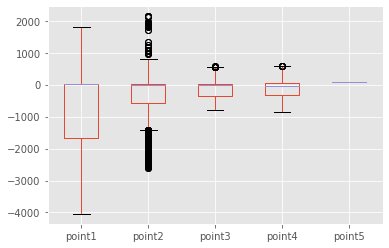

In [58]:
#break into two groups of columns
cols1 = ['point1','point2']
cols2 = ['point3','point4','point5']
cols = cols1 + cols2


#Method 7: remove point3,point4,point5 outliers using iqr, remove point1,point2 outliers using z-score
#-------------------------------------------------------------------------------------------------------------------------#

#step 1: fill all NA values with the column mean

dfFill = dataframe.copy() 
dfFill[cols] = dfFill[cols].fillna(value=dfFill[cols].mean(skipna=True))
r1 = len(dfFill.index)

#step 2: remove p3,p4,p5 outliers with iqr

q1 = dfFill[cols2].quantile(0.25)
q3 = dfFill[cols2].quantile(0.75)
iqr = q3 - q1
dfHybrid1 = dfFill[~((dfFill[cols2] < (q1 - iqr * 1.5)) | (dfFill[cols2] > (q3 + iqr * 1.5))).any(axis=1)]
r2 = len(dfHybrid1.index)

#step 3:remove p1,p2 outliers with z-score
dfHybrid2 = dfHybrid1[~((dfHybrid1[cols1] < (dfHybrid1[cols1].mean() - (3 * dfHybrid1[cols1].std()))) | 
                  (dfHybrid1[cols1] > (dfHybrid1[cols1].mean() + (3 * dfHybrid1[cols1].std())))).any(axis=1)]
r3 = len(dfHybrid2.index)

print('\nCase 1: Remove point3,point4,point5 outliers using iqr then remove point1,point2 outliers using z-score')
print('Number of rows in original data:',r1,'\nNumber of rows after 1st stage of removing outliers:',r2,
      '\nNumber of rows after 2nd stage of removing outliers:',r3)


dfHybrid1.boxplot(column=cols)

#chosen df
#-----------------------------------------------------------------------------------------------------------------------------#
dfchosen3 = dfHybrid2.copy() #MEthod 7


### comparison with the original dataset

<AxesSubplot:>

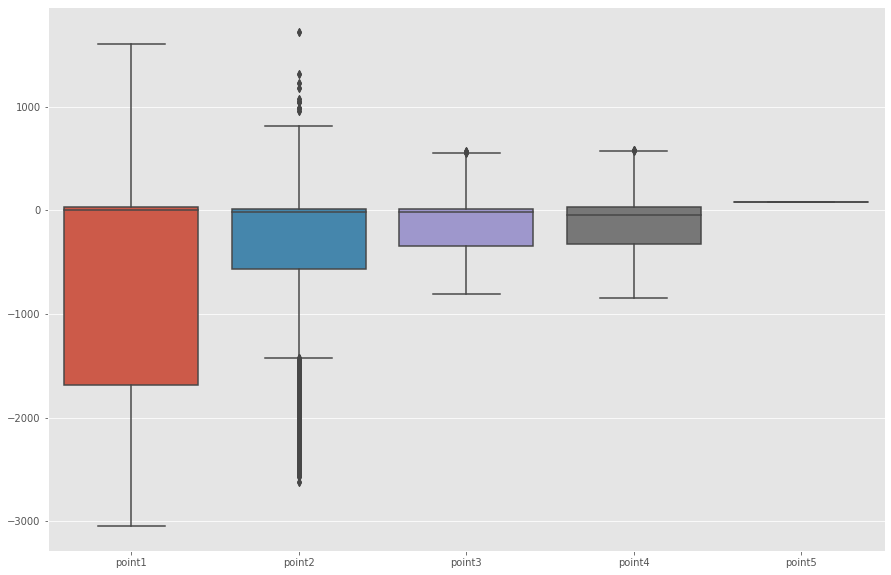

In [59]:
fig, axs = plt.subplots(figsize=(15,10))

#sns.boxplot(data=dataframe[cols],orient='v',ax=axs).set(title='Original MC1 Data')
sns.boxplot(data=dfHybrid2[cols],orient='v',ax=axs)

### "The fill all"

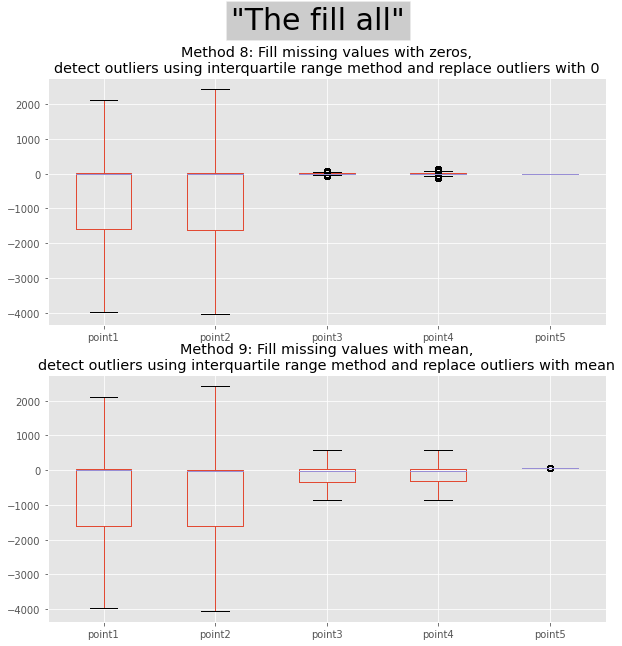

In [64]:
#fill all zero
dataframe = mc1_data.copy()
dfFillAll = dataframe.copy()
cols = ['point1','point2','point3','point4','point5']

dfFillAll[cols] = dfFillAll[cols].fillna(0)

q1 = dfFillAll[cols].quantile(0.25)
q3 = dfFillAll[cols].quantile(0.75)
iqr = q3 - q1

dfFillAll[cols] = np.where(((dfFillAll[cols] < (q1 - iqr * 1.5)) | (dfFillAll[cols] > (q3 + iqr * 1.5))), 
                               0,dfFillAll[cols])

dfFillAll0 = dfFillAll.copy()


#Method 9: fill NA with mean, find outliers using iqr and fill mean
#-------------------------------------------------------------------------------------------------------------------------#
dataframe = mc1_data.copy()
dfFillAll = dataframe.copy()
cols = ['point1','point2','point3','point4','point5']

dfFillAll[cols] = dfFillAll[cols].fillna(value=dfFillAll[cols].mean(skipna=True))

q1 = dfFillAll[cols].quantile(0.25)
q3 = dfFillAll[cols].quantile(0.75)
iqr = q3 - q1

dfFillAll[cols] = np.where(((dfFillAll[cols] < (q1 - iqr * 1.5)) | (dfFillAll[cols] > (q3 + iqr * 1.5))), 
                               dfFillAll[cols].mean() ,dfFillAll[cols])

dfFillAll1 = dfFillAll.copy()


#boxplot
fig, axs = plt.subplots(2,1,figsize=(10,10))

plt.suptitle('"The fill all"',fontsize=30,bbox={'facecolor':'0.8','pad':5})
dfFillAll0.boxplot(column=cols,ax=axs[0]).set(title='Method 8: Fill missing values with zeros,\n\
detect outliers using interquartile range method and replace outliers with 0')
dfFillAll1.boxplot(column=cols,ax=axs[1]).set(title='Method 9: Fill missing values with mean,\n\
detect outliers using interquartile range method and replace outliers with mean')

#chosen df
#-----------------------------------------------------------------------------------------------------------------------------#
dfchosen4 = dfFillAll1.copy() #Method 9


<AxesSubplot:>

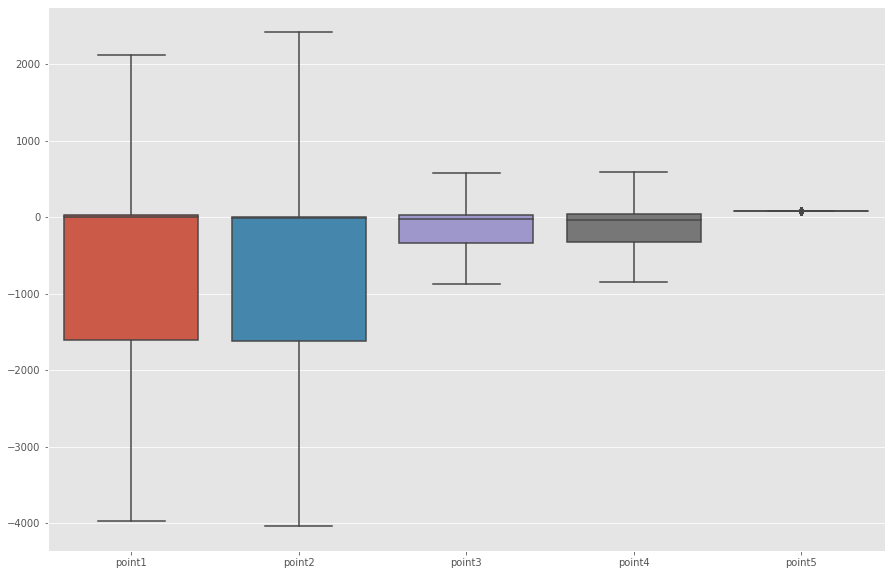

In [73]:
fig, axs = plt.subplots(figsize=(15,10))
#sns.boxplot(data=dfFillAll0[cols],orient='v',ax=axs)
sns.boxplot(data=dfFillAll1[cols],orient='v',ax=axs)

### A comparison whether using iqr or z to find outliers and fill with mean

<AxesSubplot:>

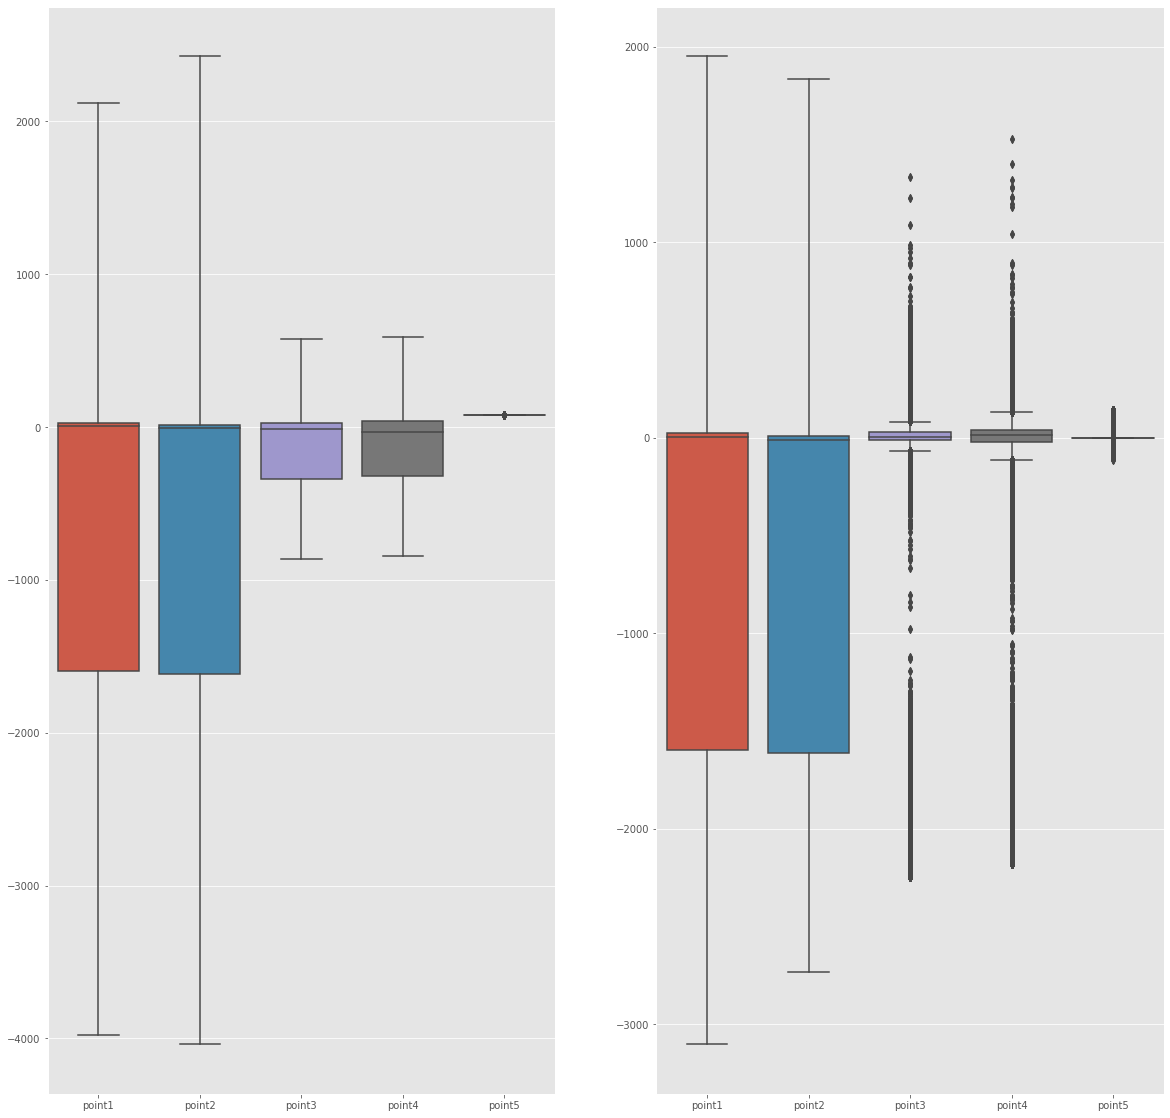

In [68]:
#fill NA with mean, find outliers using iqr and fill mean
#-------------------------------------------------------------------------------------------------------------------------#
dataframe = mc1_data.copy()
dfFillAll = dataframe.copy()
cols = ['point1','point2','point3','point4','point5']

dfFillAll[cols] = dfFillAll[cols].fillna(value=dfFillAll[cols].mean(skipna=True))

q1 = dfFillAll[cols].quantile(0.25)
q3 = dfFillAll[cols].quantile(0.75)
iqr = q3 - q1

dfFillAll[cols] = np.where(((dfFillAll[cols] < (q1 - iqr * 1.5)) | (dfFillAll[cols] > (q3 + iqr * 1.5))), 
                               dfFillAll[cols].mean() ,dfFillAll[cols])

dfFillAll1 = dfFillAll.copy()


#The other Method: fill NA with mean, find outliers using z-score and fill with mean
#-------------------------------------------------------------------------------------------------------------------------#
dataframe = mc1_data.copy()
dfFillAll = dataframe.copy()
cols = ['point1','point2','point3','point4','point5']

dfFillAll[cols] = dfFillAll[cols].fillna(value=df1[cols].mean(skipna=True))
dfFillAll[cols] = np.where(((dfFillAll[cols] < (dfFillAll[cols].mean() - (3 * dfFillAll[cols].std()))) | 
                                (dfFillAll[cols] > (dfFillAll[cols].mean() + (3 * dfFillAll[cols].std())))) , 
                                 dfFillAll[cols].mean() ,dfFillAll[cols])

dfFillAll2 = dfFillAll.copy()

#boxplot
fig, axs = plt.subplots(1,2,figsize=(20,20))
sns.boxplot(data=dfFillAll1[cols],orient='v',ax=axs[0])
sns.boxplot(data=dfFillAll2[cols],orient='v',ax=axs[1])
#sns.distplot(dfFillAll[cols],ax=axs[1])




### Histogram of each chosen Methods

### original data

<AxesSubplot:ylabel='Count'>

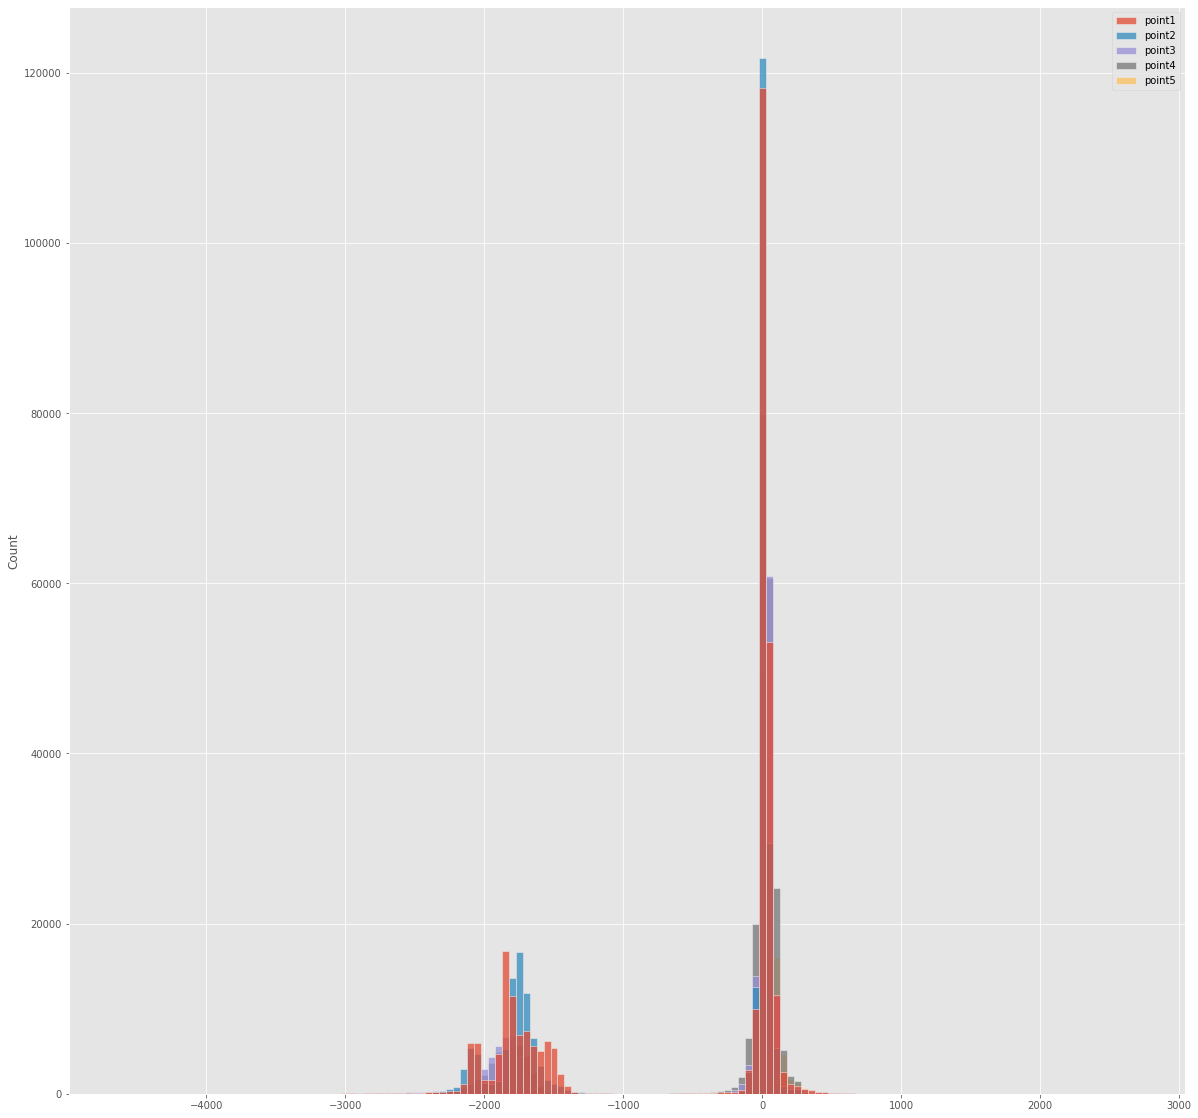

In [26]:
cols = ['point1','point2','point3','point4','point5']

fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dataframe[cols],ax=axs,binwidth=50)

### Method 2

<AxesSubplot:ylabel='Count'>

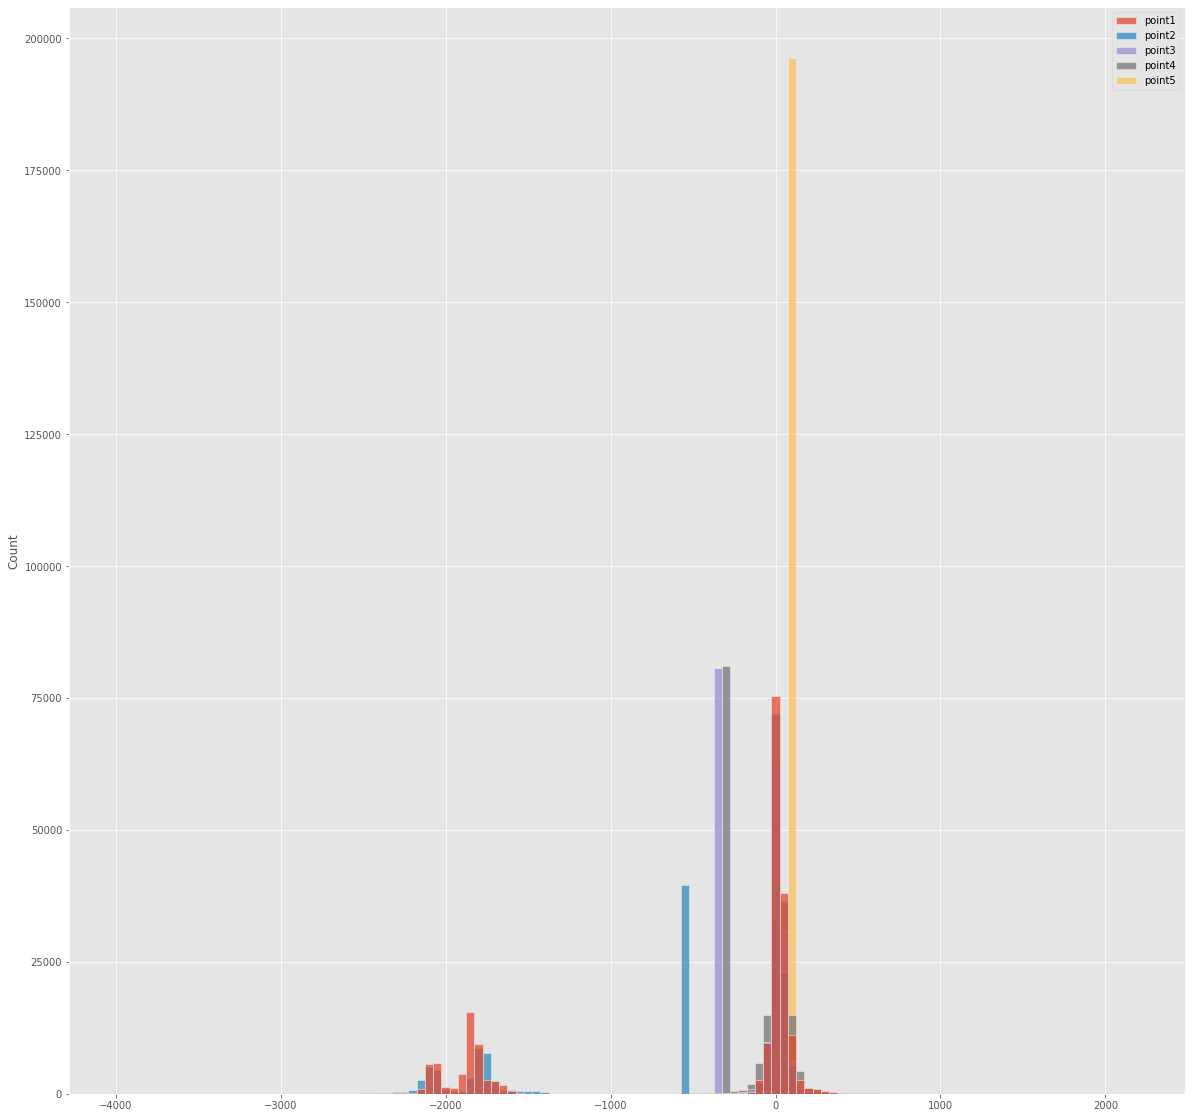

In [27]:
fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dfchosen1[cols],ax=axs,binwidth=50)

### Method 5

<AxesSubplot:ylabel='Count'>

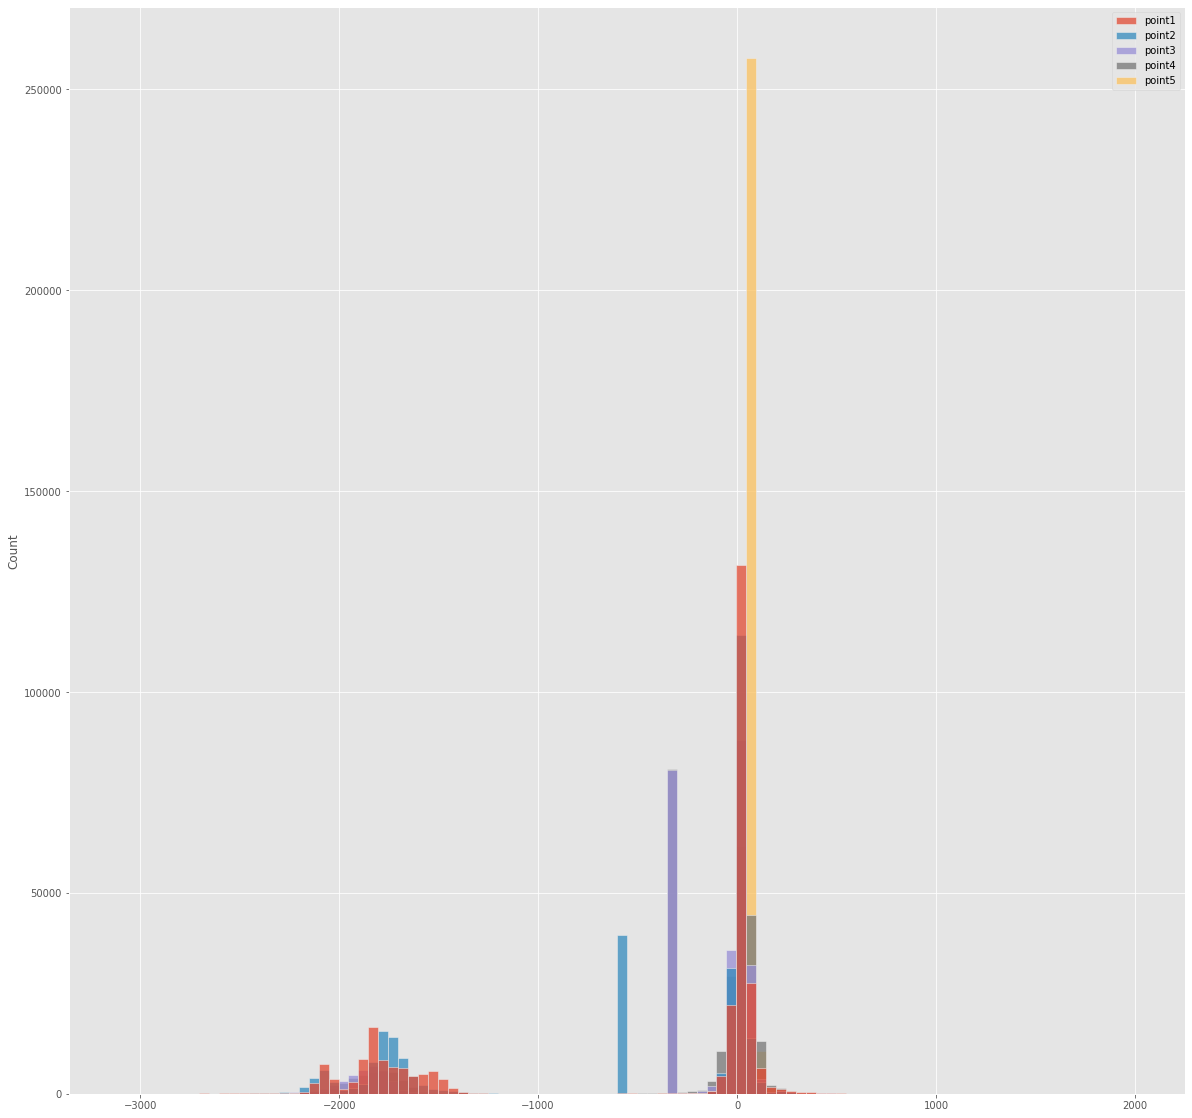

In [74]:
fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dfchosen2[cols],ax=axs,binwidth=50)

### Method 7

<AxesSubplot:ylabel='Count'>

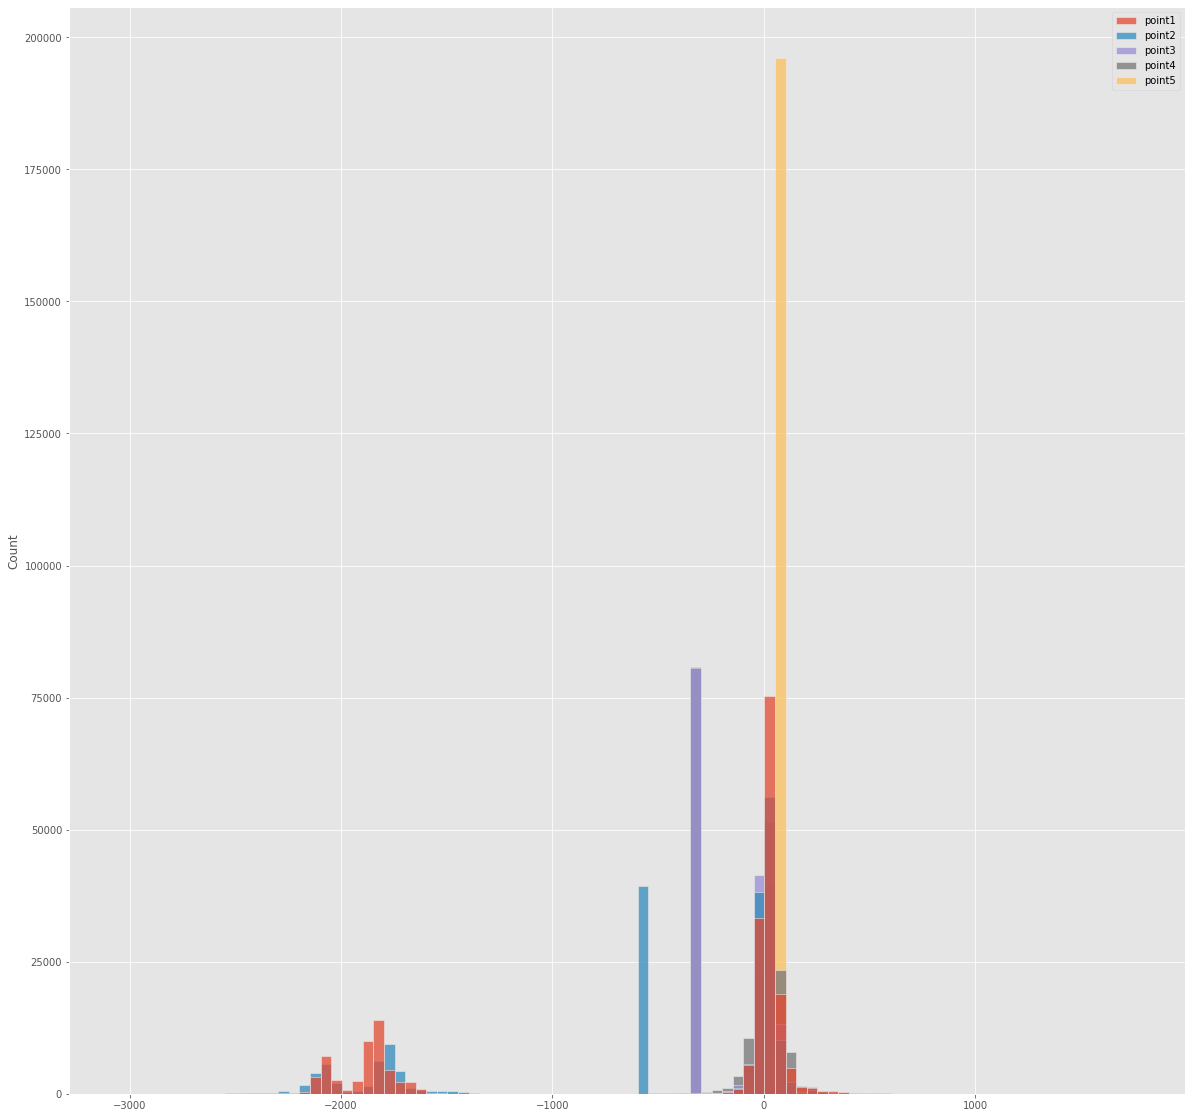

In [75]:
fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dfchosen3[cols],ax=axs,binwidth=50)

### Method 9

<AxesSubplot:ylabel='Count'>

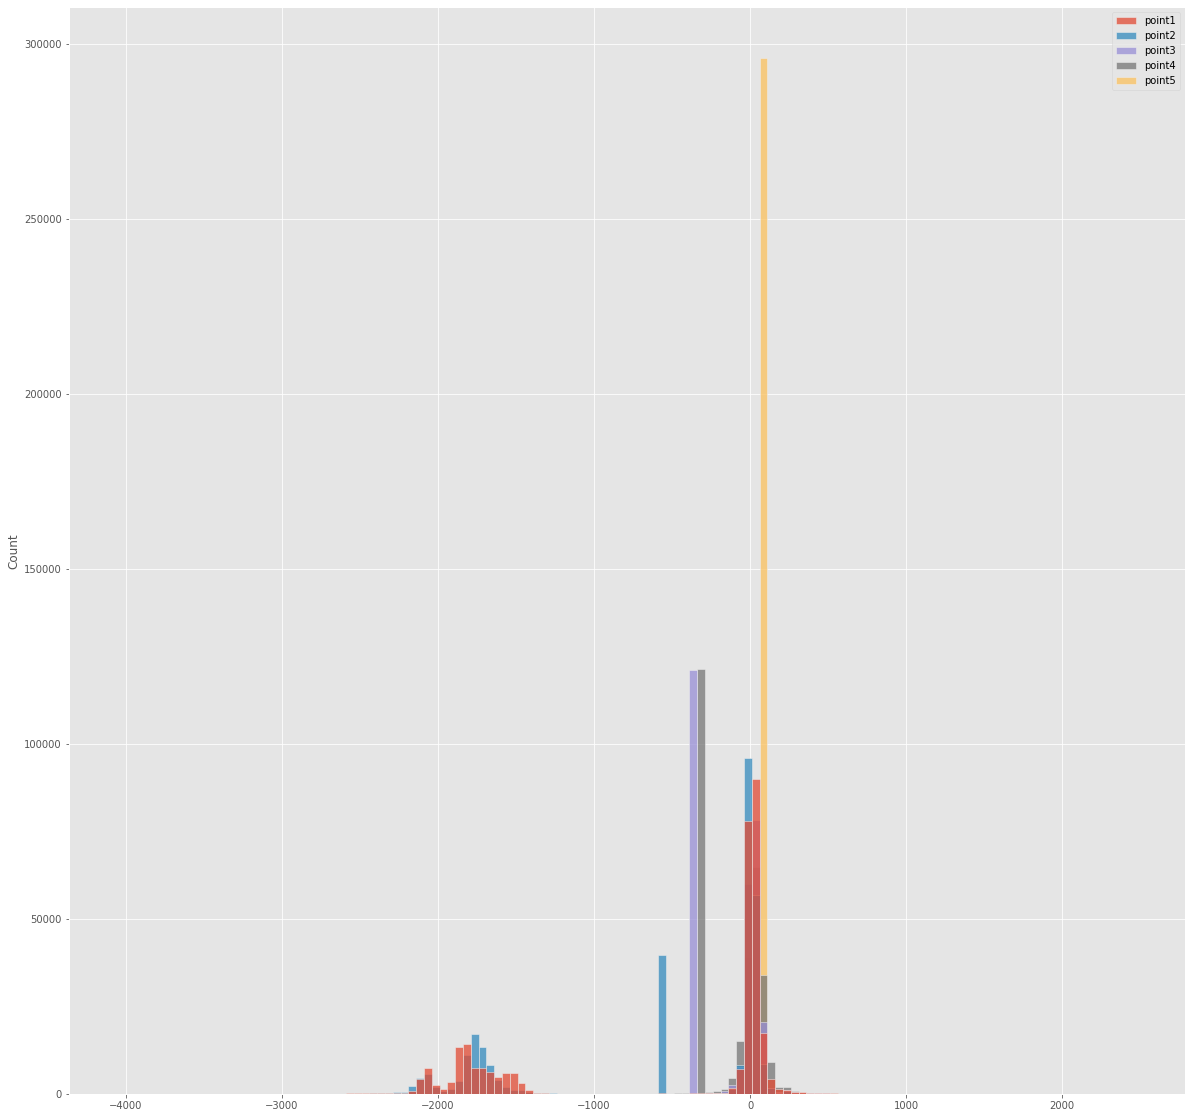

In [76]:
fig, axs = plt.subplots(figsize=(20,20))

sns.histplot(dfchosen4[cols],ax=axs,binwidth=50)

### Export data for modelling

In [94]:
#chosen data:
#drop dayOfWeek
dataset1 = dfchosen1.copy() #Method 2
dataset2 = dfchosen2.copy() #Method 5
dataset3 = dfchosen3.copy() #Method 7
dataset4 = dfchosen4.copy() #Method 9

dataset1.drop(['point5'],inplace=True,axis=1)
dataset2.drop(['point5'],inplace=True,axis=1)
dataset3.drop(['point5'],inplace=True,axis=1)
dataset4.drop(['point5'],inplace=True,axis=1)

#final check for null values
anyEmptyCols = dataset1.isnull().any().any() & dataset2.isnull().any().any() & dataset3.isnull().any().any() & dataset4.isnull().any().any()
print("Is there any empty columns left in each datasets? ",anyEmptyCols)


Is there any empty columns left in each datasets?  False


In [95]:
dataset1.to_csv('MC1_Datasets\Dataset_1.csv',index=False)
dataset2.to_csv('MC1_Datasets\Dataset_2.csv',index=False)
dataset3.to_csv('MC1_Datasets\Dataset_3.csv',index=False)
dataset4.to_csv('MC1_Datasets\Dataset_4.csv',index=False)